In [4]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score

In [151]:
dat = pd.read_excel('Pilot_GeneExpressionData.xlsx')

In [5]:
dat

,Expression - gene 000,Expression - gene 001,Expression - gene 002,Expression - gene 003,Expression - gene 004,Expression - gene 005,Expression - gene 006,Expression - gene 007,Expression - gene 008,Expression - gene 009,...,Expression - gene 090,Expression - gene 091,Expression - gene 092,Expression - gene 093,Expression - gene 094,Expression - gene 095,Expression - gene 096,Expression - gene 097,Expression - gene 098,Expression - gene 099
0,-1.237358,38.642584,10.884096,-3.339147,-1.555339,14.407978,55.770644,13.109897,11.652522,365.928797,...,68.662581,1.343553,20.079415,48.342081,5.199666,8.582158,325.058081,413.412361,655.467974,224.045697
1,-2.093798,39.399697,5.863917,-2.270315,-0.486506,9.469040,60.626785,9.492048,17.507333,365.129055,...,79.764261,12.445233,11.953880,52.238938,-0.116666,4.537059,321.012982,413.379518,655.339022,224.529880
2,14.470170,36.381095,-9.510318,15.156488,16.940296,-7.909798,74.697892,-4.465825,12.619979,335.499965,...,73.074749,5.755721,16.613457,55.059154,4.151859,5.631896,322.107819,411.768780,655.437052,224.088647
3,-3.074387,39.030519,9.228330,-3.344361,-1.560553,12.287957,58.692670,11.807070,15.281483,366.153522,...,68.135925,0.816897,22.837977,49.460210,7.882375,8.555372,325.031295,411.803469,655.470397,223.914104
4,-0.898006,39.088386,4.945750,-1.124616,0.659192,8.204751,61.690854,8.721729,16.890130,362.689877,...,77.619769,10.300741,14.478982,50.745263,1.451071,5.621678,322.097601,413.323667,655.363004,224.430544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,12.615589,36.598107,-7.345092,13.595942,15.379751,-5.879808,73.150958,-2.758040,12.639858,338.132539,...,70.516379,3.197351,18.864693,52.088667,5.255283,7.102821,323.578744,412.274116,655.452935,224.046372
4890,1.613536,38.322495,4.236704,0.420512,2.204321,7.376949,62.643327,7.956535,14.224713,358.798674,...,66.752538,-0.566490,24.111794,42.491838,6.873288,10.740558,327.216481,414.301530,655.470614,224.084468
4891,0.333339,39.274807,0.705602,1.015152,2.798960,4.313178,65.747741,5.387821,19.485853,359.882050,...,77.500270,10.181242,14.018217,50.435560,1.057676,5.567043,322.042966,413.489710,655.351961,224.478674
4892,2.735758,38.561036,-1.058395,4.172354,5.956162,1.442543,67.973740,3.798262,18.125243,354.280755,...,73.427989,6.108961,20.665591,49.344682,5.941653,7.506026,323.981949,412.338047,655.434907,224.110261


Kmeans , optic and dbscan

In [21]:
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [152]:

pipeline = Pipeline([
 ('scale', StandardScaler()),
 ('PCA', PCA())
])

pca = pd.DataFrame(pipeline.fit_transform(dat),columns=pipeline['PCA'].get_feature_names_out())
print(pca)
pipeline.fit(dat)

pipeline['PCA'].explained_variance_


          pca0      pca1      pca2      pca3      pca4      pca5      pca6   
0    -5.544767  2.717605 -8.594973 -5.500864  6.647001  0.282942  1.674030  \
1    -7.200475 -7.526954  2.624290 -1.114498  0.765139  0.113852  0.658387   
2     7.855053  6.302694  6.282120 -2.166174  1.453349 -0.308374 -0.079918   
3    -7.459648  3.718405 -3.855239  1.108657  5.881422  0.589935 -2.036945   
4    -5.884115 -5.344226  2.013932 -0.541739 -0.232778 -0.186916  0.401733   
...        ...       ...       ...       ...       ...       ...       ...   
4889  5.972507  8.254149  4.975134 -0.869118  1.831111 -0.233525 -1.312430   
4890 -3.091708  7.866303 -3.209349 -0.738923 -3.248829  0.564579  0.965804   
4891 -4.568357 -5.042849  4.923147  2.120696 -1.735770  1.414009  1.127388   
4892 -1.494967 -0.240045  4.071157  4.036894 -0.636108 -2.133743  0.912785   
4893 -6.715863 -7.365794  4.522817  0.220842  0.434046  0.928263  0.708044   

          pca7      pca8      pca9  ...         pca90         p

array([3.69633915e+01, 2.65800689e+01, 1.39162556e+01, 1.00375940e+01,
       6.86691994e+00, 2.77081944e+00, 1.78885257e+00, 3.81090785e-01,
       3.64260134e-01, 1.33666963e-01, 1.11559427e-01, 4.57334298e-02,
       1.85615297e-02, 1.43091344e-02, 9.20508099e-03, 6.83963996e-03,
       3.51901471e-03, 2.25783540e-03, 2.13820477e-03, 1.63410293e-03,
       7.00512984e-04, 4.30940582e-04, 2.92895543e-04, 9.22011347e-05,
       9.04763920e-05, 5.19897303e-05, 4.04097899e-05, 3.22627184e-05,
       1.45627333e-05, 5.17775428e-06, 3.06988877e-06, 2.84481068e-06,
       9.20204646e-07, 5.34656510e-07, 4.47661313e-07, 3.60079722e-07,
       1.82296341e-07, 1.62288566e-07, 9.02555218e-08, 4.80732143e-08,
       1.70875576e-08, 8.16661234e-09, 2.19337278e-09, 1.64092334e-09,
       1.46321049e-09, 9.43737324e-10, 7.87860534e-10, 4.23763357e-10,
       2.95068343e-10, 1.78235797e-10, 3.63144932e-11, 2.22456029e-11,
       8.43328070e-12, 5.61307859e-12, 3.51759789e-12, 3.28273667e-12,
      

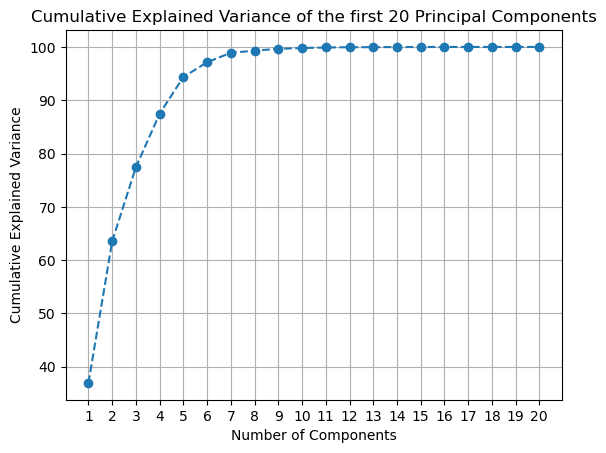

In [20]:
#Plot cummulative variance 
explained_variance_ratio = pipeline['PCA'].explained_variance_

cumulative_variance = np.cumsum(explained_variance_ratio)

#plt.figure(figsize=(10,6))
plt.plot(range(1, 21), cumulative_variance[:20], marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance of the first 20 Principal Components')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

Use only 8 components

<AxesSubplot:xlabel='pca1', ylabel='pca0'>

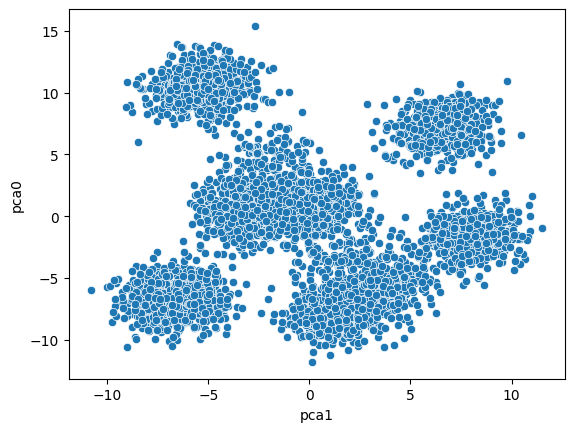

In [28]:
sn.scatterplot(data=pca, y ='pca0' ,x = 'pca1')

In [153]:
pca_subset = pca.iloc[:, :9]
pca_subset

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
0,-5.544767,2.717605,-8.594973,-5.500864,6.647001,0.282942,1.674030,-0.656837,-0.427550
1,-7.200475,-7.526954,2.624290,-1.114498,0.765139,0.113852,0.658387,-0.639207,-0.209721
2,7.855053,6.302694,6.282120,-2.166174,1.453349,-0.308374,-0.079918,-0.423742,0.102670
3,-7.459648,3.718405,-3.855239,1.108657,5.881422,0.589935,-2.036945,-0.516927,1.064135
4,-5.884115,-5.344226,2.013932,-0.541739,-0.232778,-0.186916,0.401733,-0.384235,-0.047743
...,...,...,...,...,...,...,...,...,...
4889,5.972507,8.254149,4.975134,-0.869118,1.831111,-0.233525,-1.312430,0.065532,-0.933112
4890,-3.091708,7.866303,-3.209349,-0.738923,-3.248829,0.564579,0.965804,-0.153958,-0.629847
4891,-4.568357,-5.042849,4.923147,2.120696,-1.735770,1.414009,1.127388,-0.027496,0.241210
4892,-1.494967,-0.240045,4.071157,4.036894,-0.636108,-2.133743,0.912785,0.374913,0.173768


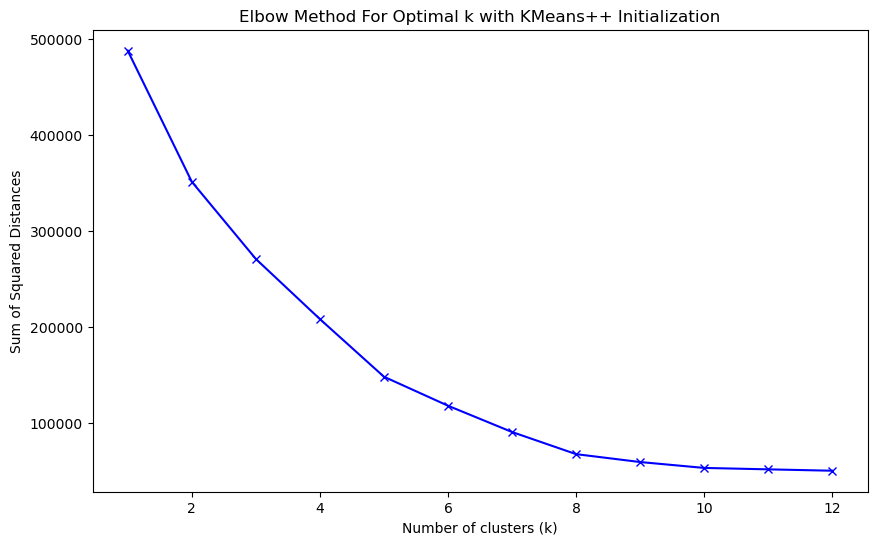

In [32]:
# Determine the range of cluster counts; for this example, we'll use 1 through 12.
range_n_clusters = list(range(1, 13))

# Compute the sum of squared distances for each number of clusters
ssd = []  # Sum of squared distances
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0,n_init=20)
    kmeans.fit(pca_subset)
    ssd.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k with KMeans++ Initialization')
plt.show()

For n_clusters=2, the silhouette score is 0.3190
For n_clusters=2, the Davies-Bouldin Index is 1.3819
For n_clusters=3, the silhouette score is 0.3149
For n_clusters=3, the Davies-Bouldin Index is 1.3880
For n_clusters=4, the silhouette score is 0.3757
For n_clusters=4, the Davies-Bouldin Index is 1.1000
For n_clusters=5, the silhouette score is 0.4424
For n_clusters=5, the Davies-Bouldin Index is 0.9605
For n_clusters=6, the silhouette score is 0.4827
For n_clusters=6, the Davies-Bouldin Index is 0.8959
For n_clusters=7, the silhouette score is 0.5243
For n_clusters=7, the Davies-Bouldin Index is 0.7695
For n_clusters=8, the silhouette score is 0.5404
For n_clusters=8, the Davies-Bouldin Index is 0.7239
For n_clusters=9, the silhouette score is 0.5517
For n_clusters=9, the Davies-Bouldin Index is 0.6894
For n_clusters=10, the silhouette score is 0.5567
For n_clusters=10, the Davies-Bouldin Index is 0.6786
For n_clusters=11, the silhouette score is 0.5020
For n_clusters=11, the Davies-

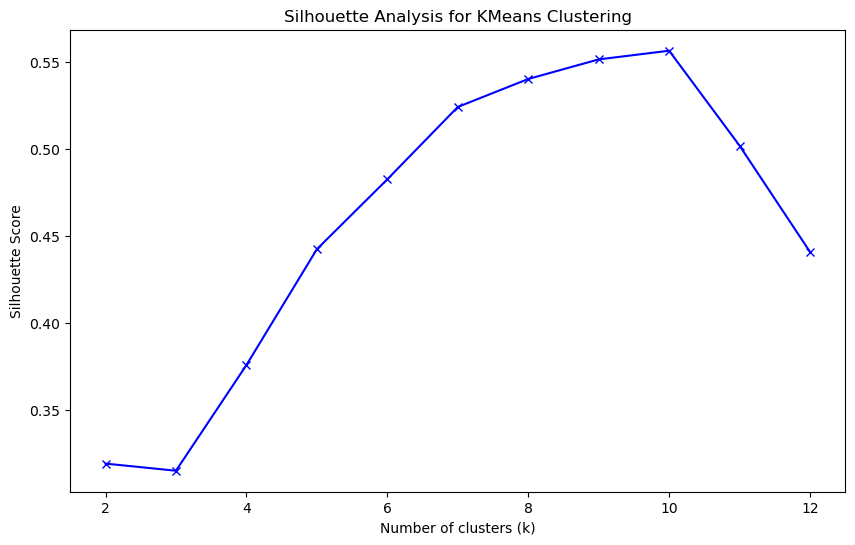

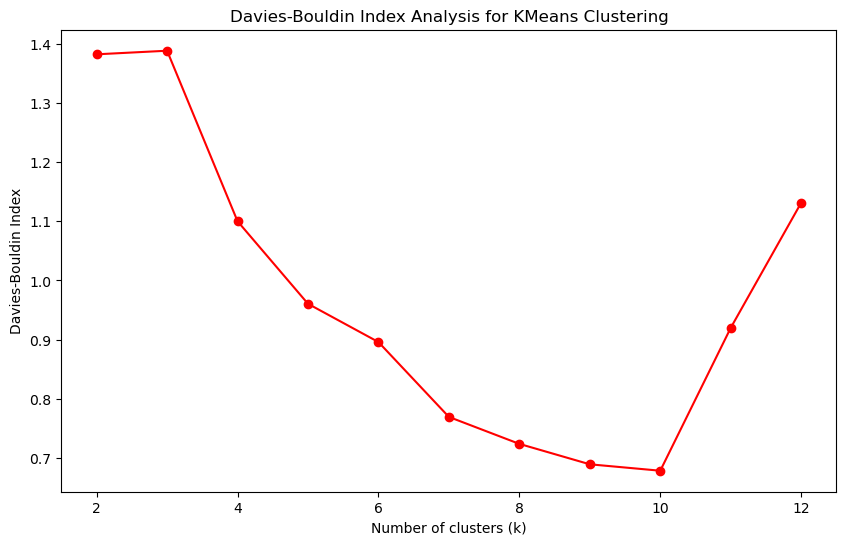

In [36]:

# Values of k (number of clusters)
range_n_clusters = list(range(2, 13))

silhouette_scores = []
dbi_scores = []  

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0, n_init=20)
    cluster_labels = kmeans.fit_predict(pca_subset)
    
    # Silhouette score
    silhouette_avg = silhouette_score(pca_subset, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={n_clusters}, the silhouette score is {silhouette_avg:.4f}")
    
    # Davies-Bouldin Index
    dbi = davies_bouldin_score(pca_subset, cluster_labels)
    dbi_scores.append(dbi)
    print(f"For n_clusters={n_clusters}, the Davies-Bouldin Index is {dbi:.4f}")


plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.show()


plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, dbi_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index Analysis for KMeans Clustering')
plt.show()

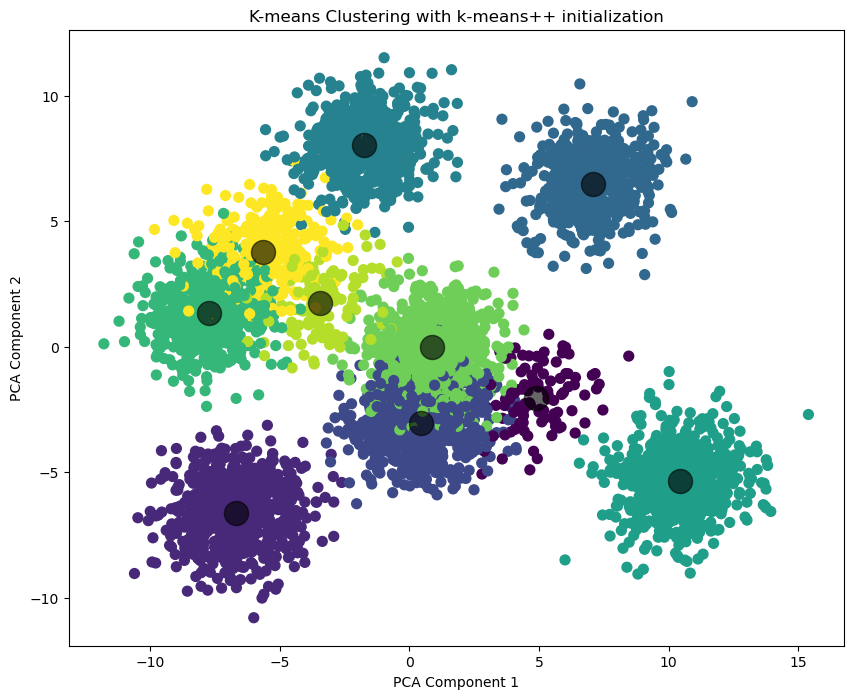

In [87]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0, n_init=20)
kmeans.fit(pca_subset)

# Predict the cluster for each data point
y_kmeans = kmeans.predict(pca_subset)
# Cluster centers
centers = kmeans.cluster_centers_

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_subset.iloc[:, 0], pca_subset.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6)
plt.title('K-means Clustering with k-means++ initialization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
#Decided to do 8 clusters due to the logic behind the silhouette score, how the clustering looks and elbow plot.

DBScan

min_sample and epsilon are the hyperparameters


In [39]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

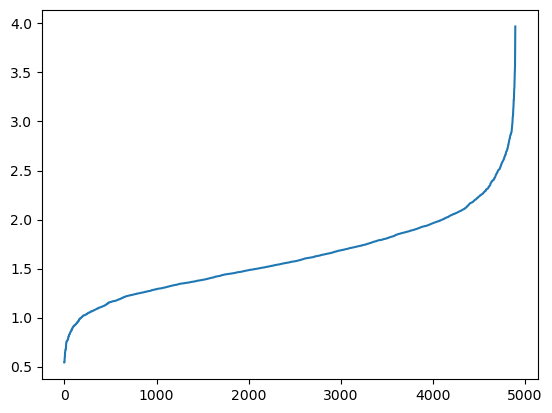

In [55]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(pca_subset)
distances, indices = nbrs.kneighbors(pca_subset)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

1.5 + looks like a good epsilon

In [73]:
# Parameter grid
eps_values = [ 1,1.3 ,1.5, 2,2.5,3,3.3,3.5,4,4.3,4.8,5]
min_samples_values = [5,10,20,50,100,150]

# To keep track of the best params and scores
best_silhouette_score = -1  # initialize with a low value since we want to maximize it
best_dbi_score = float('inf')  # initialize with a high value since we want to minimize it
best_params_silhouette = {}
best_params_dbi = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(pca_subset)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # discount noise if present
        
        print(f"For eps={eps}, min_samples={min_samples}: found {n_clusters} clusters.")
        
        # Only score clusters with more than 1 cluster and less clusters than the data length
        if len(set(labels)) > 1 and len(set(labels)) < len(pca_subset):
            silhouette_avg = silhouette_score(pca_subset, labels)
            dbi = davies_bouldin_score(pca_subset, labels)
            
            # Update best silhouette score and params
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_params_silhouette = {'eps': eps, 'min_samples': min_samples}
            
            # Update best DBI score and params
            if dbi < best_dbi_score:
                best_dbi_score = dbi
                best_params_dbi = {'eps': eps, 'min_samples': min_samples}

print("\nBest parameters using Silhouette Score:", best_params_silhouette)
print("Best silhouette score:", best_silhouette_score)
print("\nBest parameters using Davies-Bouldin Index:", best_params_dbi)
print("Best Davies-Bouldin Index:", best_dbi_score)

For eps=1, min_samples=5: found 0 clusters.
For eps=1, min_samples=10: found 0 clusters.
For eps=1, min_samples=20: found 0 clusters.
For eps=1, min_samples=50: found 0 clusters.
For eps=1, min_samples=100: found 0 clusters.
For eps=1, min_samples=150: found 0 clusters.
For eps=1.3, min_samples=5: found 17 clusters.
For eps=1.3, min_samples=10: found 0 clusters.
For eps=1.3, min_samples=20: found 0 clusters.
For eps=1.3, min_samples=50: found 0 clusters.
For eps=1.3, min_samples=100: found 0 clusters.
For eps=1.3, min_samples=150: found 0 clusters.
For eps=1.5, min_samples=5: found 50 clusters.
For eps=1.5, min_samples=10: found 6 clusters.
For eps=1.5, min_samples=20: found 0 clusters.
For eps=1.5, min_samples=50: found 0 clusters.
For eps=1.5, min_samples=100: found 0 clusters.
For eps=1.5, min_samples=150: found 0 clusters.
For eps=2, min_samples=5: found 16 clusters.
For eps=2, min_samples=10: found 9 clusters.
For eps=2, min_samples=20: found 8 clusters.
For eps=2, min_samples=50:

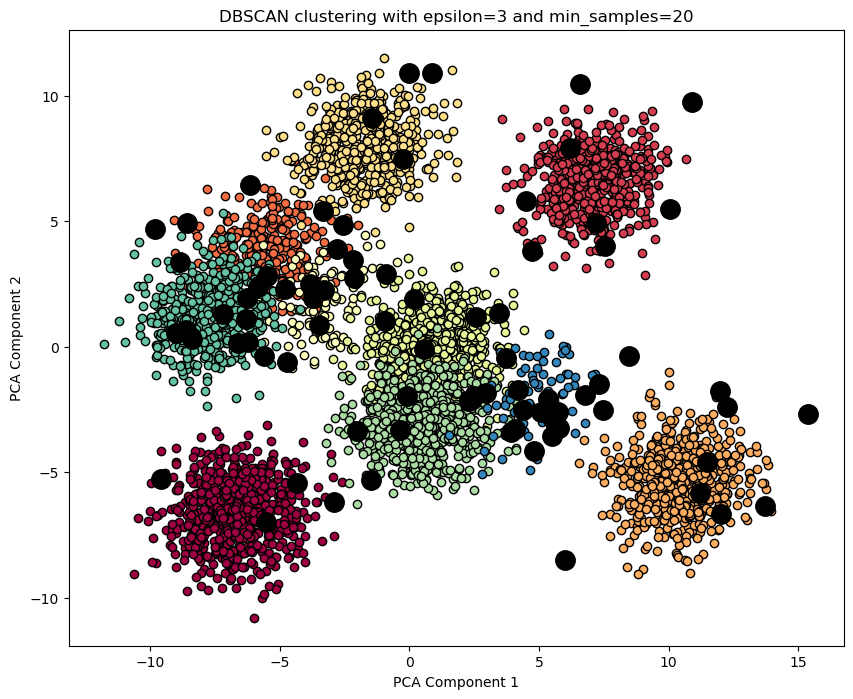

In [74]:
epsilon, min_samples = 3 , 20
# Perform DBSCAN clustering
db = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = db.fit_predict(pca_subset)

# Plot the clustering result using the first two PCA components
plt.figure(figsize=(10, 8))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    xy = pca_subset[class_member_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14 if k == -1 else 6)

plt.title('DBSCAN clustering with epsilon={} and min_samples={}'.format(epsilon, min_samples))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

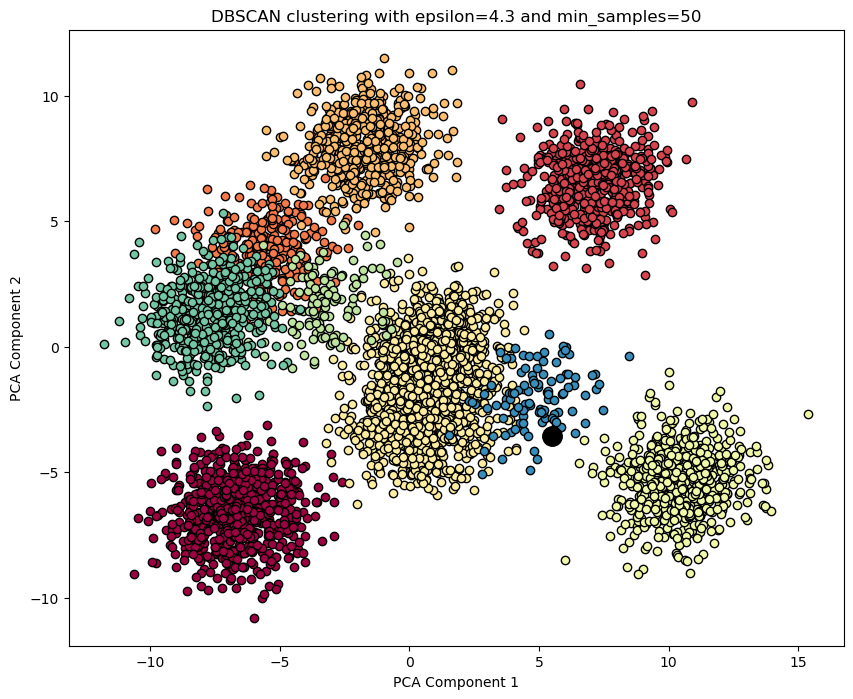

In [126]:
epsilon, min_samples = 4.3 , 50
# Perform DBSCAN clustering
db = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = db.fit_predict(pca_subset)

# Plot the clustering result using the first two PCA components
plt.figure(figsize=(10, 8))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    xy = pca_subset[class_member_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14 if k == -1 else 6)

plt.title('DBSCAN clustering with epsilon={} and min_samples={}'.format(epsilon, min_samples))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

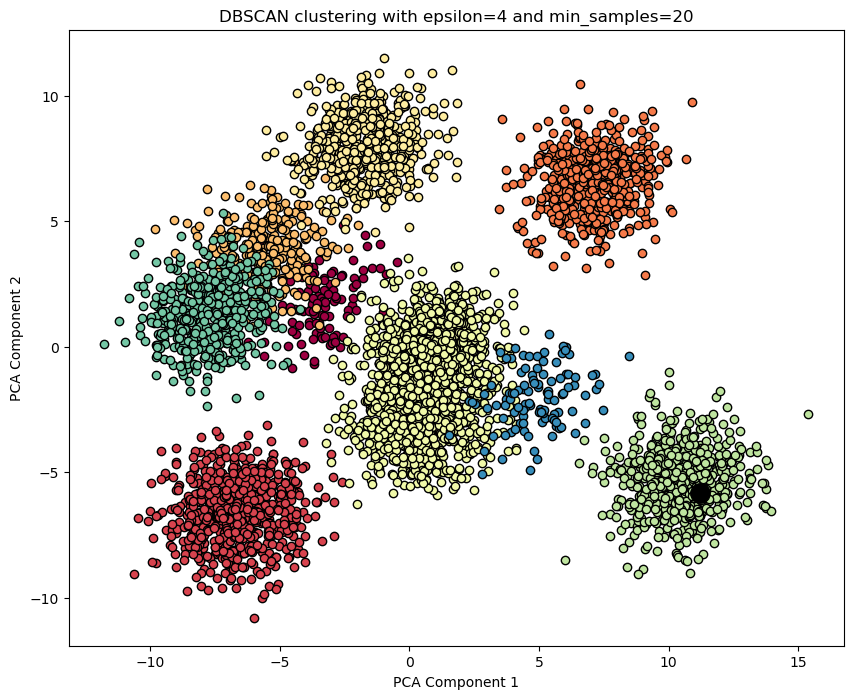

In [75]:
epsilon, min_samples = 4 ,20
# Perform DBSCAN clustering
db = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = db.fit_predict(pca_subset)

# Plot the clustering result using the first two PCA components
plt.figure(figsize=(10, 8))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    xy = pca_subset[class_member_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14 if k == -1 else 6)

plt.title('DBSCAN clustering with epsilon={} and min_samples={}'.format(epsilon, min_samples))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

In [ ]:
#For the DBScan , for the best 2 metrics, it found 9 and 10 clusters. With 1 dot being the noise

OPTICS

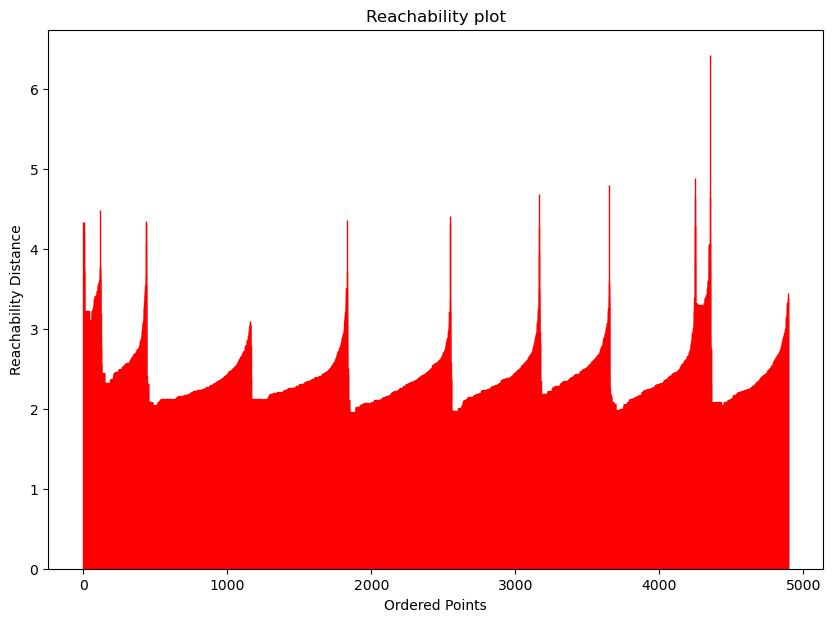

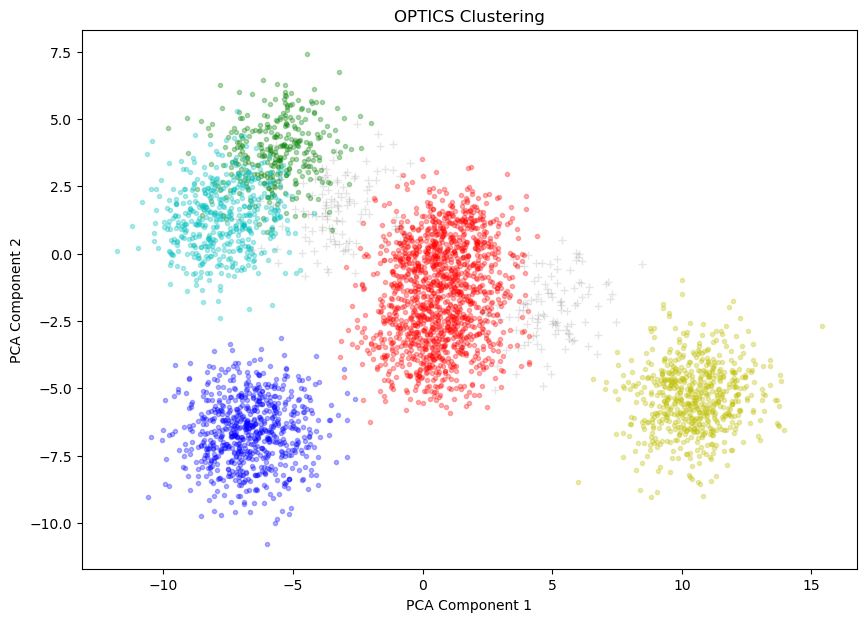

In [82]:
optics = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

# Fit the model
optics.fit(pca_subset)

# Reachability plot
space = np.arange(len(pca_subset))
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]

plt.figure(figsize=(10, 7))
plt.bar(space, reachability, color='r', edgecolor='r')
plt.title('Reachability plot')
plt.xlabel('Ordered Points')
plt.ylabel('Reachability Distance')
plt.show()


colors = ['g.', 'r.', 'b.', 'y.', 'c.']

plt.figure(figsize=(10, 7))
for klass, color in zip(range(0, 5), colors):
    Xk = pca_subset.iloc[optics.labels_ == klass]
    plt.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], color, alpha=0.3)
plt.title('OPTICS Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')


Xk = pca_subset.iloc[optics.labels_ == -1]
plt.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], 'k+', alpha=0.1)

plt.show()

In [84]:
# Parameter grid
xi_values = [0.05, 0.1, 0.2, 0.3]
min_samples_values = [5, 10, 20, 50, 100]
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

results = []

for xi in xi_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            optics = OPTICS(min_samples=min_samples, xi=xi, metric=metric, cluster_method='xi',n_jobs=3)
            labels = optics.fit_predict(pca_subset)
            
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise from cluster count
            
            # Check if there is more than one cluster and not every point is its own cluster
            if 1 < n_clusters < len(pca_subset):
                silhouette_avg = silhouette_score(pca_subset, labels)
                dbi = davies_bouldin_score(pca_subset, labels)
                
                results.append({
                    'xi': xi,
                    'min_samples': min_samples,
                    'metric': metric,
                    'n_clusters': n_clusters,
                    'silhouette_score': silhouette_avg,
                    'dbi_score': dbi
                })


results_df = pd.DataFrame(results)


best_silhouette = results_df.loc[results_df['silhouette_score'].idxmax()]
best_dbi = results_df.loc[results_df['dbi_score'].idxmin()]

print("Best result using Silhouette Score:")
print(best_silhouette)
print("\nBest result using Davies-Bouldin Index:")
print(best_dbi)


sorted_results = results_df.sort_values(by='silhouette_score', ascending=False)
print("\nAll results sorted by Silhouette Score:")
print(sorted_results)

Best result using Silhouette Score:
xi                       0.05
min_samples                50
metric              manhattan
n_clusters                  8
silhouette_score     0.524622
dbi_score            0.741615
Name: 13, dtype: object

Best result using Davies-Bouldin Index:
xi                        0.1
min_samples                10
metric              euclidean
n_clusters                  9
silhouette_score     0.486182
dbi_score            0.711016
Name: 24, dtype: object

All results sorted by Silhouette Score:
      xi  min_samples     metric  n_clusters  silhouette_score  dbi_score
13  0.05           50  manhattan           8          0.524622   0.741615
35  0.10           50  minkowski           8          0.523718   0.747243
32  0.10           50  euclidean           8          0.523718   0.747243
10  0.05           20  chebyshev           9          0.523391   1.708425
30  0.10           20  chebyshev           9          0.523182   1.607111
..   ...          ...        .

In [85]:
print("Best result using Silhouette Score:")
print(best_silhouette)
print("\nBest result using Davies-Bouldin Index:")
print(best_dbi)


sorted_results = results_df.sort_values(by='silhouette_score', ascending=False)
print("\nAll results sorted by Silhouette Score:")
print(sorted_results)

Best result using Silhouette Score:
xi                       0.05
min_samples                50
metric              manhattan
n_clusters                  8
silhouette_score     0.524622
dbi_score            0.741615
Name: 13, dtype: object

Best result using Davies-Bouldin Index:
xi                        0.1
min_samples                10
metric              euclidean
n_clusters                  9
silhouette_score     0.486182
dbi_score            0.711016
Name: 24, dtype: object

All results sorted by Silhouette Score:
      xi  min_samples     metric  n_clusters  silhouette_score  dbi_score
13  0.05           50  manhattan           8          0.524622   0.741615
35  0.10           50  minkowski           8          0.523718   0.747243
32  0.10           50  euclidean           8          0.523718   0.747243
10  0.05           20  chebyshev           9          0.523391   1.708425
30  0.10           20  chebyshev           9          0.523182   1.607111
..   ...          ...        .

In [86]:
sorted_results.to_csv('optics_clustering_results.csv', index=False)


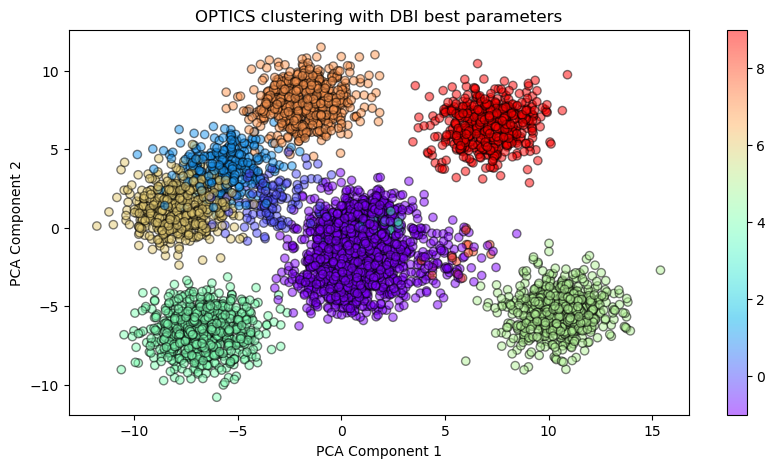

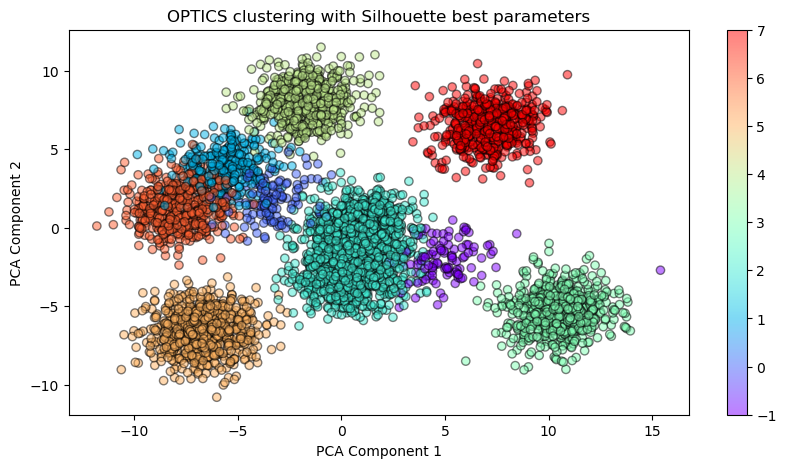

In [90]:
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS

# Fit the model for DBI best parameters
optics_dbi = OPTICS(min_samples=10, metric='euclidean')
optics_dbi.fit(pca_subset)
labels_dbi = optics_dbi.labels_

# Fit the model for Silhouette best parameters
optics_silhouette = OPTICS(min_samples=50, metric='manhattan')
optics_silhouette.fit(pca_subset)
labels_silhouette = optics_silhouette.labels_

# Plotting the DBI results
plt.figure(figsize=(10, 5))
plt.scatter(pca_subset.iloc[:, 0], pca_subset.iloc[:, 1], c=labels_dbi, cmap='rainbow', alpha=0.5, edgecolor='k')
plt.title('OPTICS clustering with DBI best parameters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Plotting the Silhouette results
plt.figure(figsize=(10, 5))
plt.scatter(pca_subset.iloc[:, 0], pca_subset.iloc[:, 1], c=labels_silhouette, cmap='rainbow', alpha=0.5, edgecolor='k')
plt.title('OPTICS clustering with Silhouette best parameters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


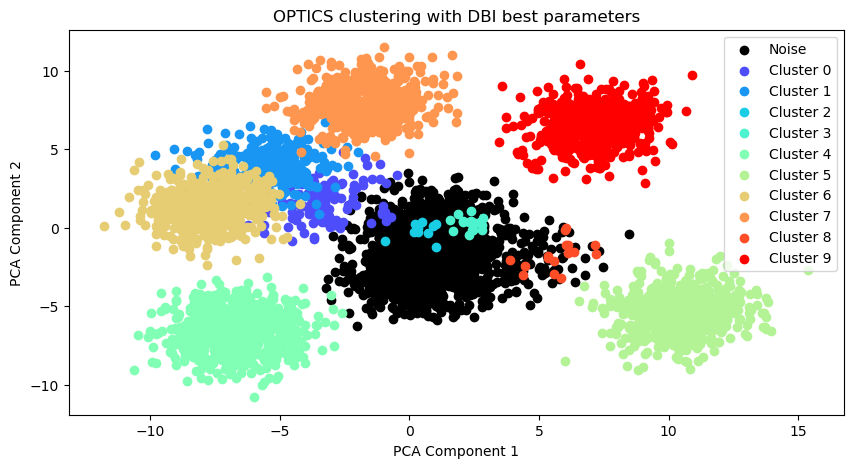

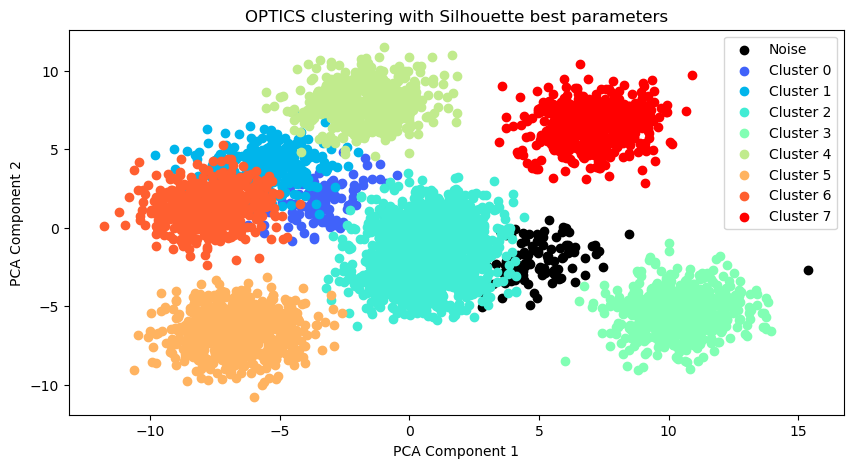

In [91]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Define colors for each cluster and noise
unique_labels_dbi = np.unique(labels_dbi)
colors_dbi = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(unique_labels_dbi))]

# Create a listed colormap
cmap_dbi = ListedColormap(colors_dbi)

# Plotting the DBI results with categorical legend
plt.figure(figsize=(10, 5))
for k, col in zip(unique_labels_dbi, colors_dbi):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels_dbi == k)

    plt.scatter(pca_subset.iloc[class_member_mask, 0], pca_subset.iloc[class_member_mask, 1], 
                c=[col], label=('Noise' if k == -1 else 'Cluster %d' % k))
plt.title('OPTICS clustering with DBI best parameters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Define colors for each cluster and noise for silhouette
unique_labels_silhouette = np.unique(labels_silhouette)
colors_silhouette = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(unique_labels_silhouette))]

# Create a listed colormap
cmap_silhouette = ListedColormap(colors_silhouette)

# Plotting the Silhouette results with categorical legend
plt.figure(figsize=(10, 5))
for k, col in zip(unique_labels_silhouette, colors_silhouette):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels_silhouette == k)

    plt.scatter(pca_subset.iloc[class_member_mask, 0], pca_subset.iloc[class_member_mask, 1], 
                c=[col], label=('Noise' if k == -1 else 'Cluster %d' % k))
plt.title('OPTICS clustering with Silhouette best parameters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [103]:
# Parameter grid
xi_values = [0.05, 0.1, 0.2, 0.3,0.4,0.5]
min_samples_values = [5, 10, 20, 50, 100]
metrics = ['euclidean', 'manhattan']

results = []

for xi in xi_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            optics = OPTICS(min_samples=min_samples, xi=xi, metric=metric, cluster_method='xi',n_jobs=4)
            labels = optics.fit_predict(pca_subset)
            
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise from cluster count
            
            # Check if there is more than one cluster and not every point is its own cluster
            if 1 < n_clusters < len(pca_subset):
                silhouette_avg = silhouette_score(pca_subset, labels)
                dbi = davies_bouldin_score(pca_subset, labels)
                
                results.append({
                    'xi': xi,
                    'min_samples': min_samples,
                    'metric': metric,
                    'n_clusters': n_clusters,
                    'silhouette_score': silhouette_avg,
                    'dbi_score': dbi
                })


results_df = pd.DataFrame(results)


best_silhouette = results_df.loc[results_df['silhouette_score'].idxmax()]
best_dbi = results_df.loc[results_df['dbi_score'].idxmin()]

print("Best result using Silhouette Score:")
print(best_silhouette)
print("\nBest result using Davies-Bouldin Index:")
print(best_dbi)


sorted_results = results_df.sort_values(by='silhouette_score', ascending=False)
print("\nAll results sorted by Silhouette Score:")
print(sorted_results)

Best result using Silhouette Score:
xi                       0.05
min_samples                50
metric              manhattan
n_clusters                  8
silhouette_score     0.524622
dbi_score            0.741615
Name: 7, dtype: object

Best result using Davies-Bouldin Index:
xi                        0.1
min_samples                10
metric              euclidean
n_clusters                  9
silhouette_score     0.486182
dbi_score            0.711016
Name: 12, dtype: object

All results sorted by Silhouette Score:
      xi  min_samples     metric  n_clusters  silhouette_score  dbi_score
7   0.05           50  manhattan           8          0.524622   0.741615
16  0.10           50  euclidean           8          0.523718   0.747243
13  0.10           10  manhattan           8          0.523137   0.736844
11  0.10            5  manhattan           9          0.522850   1.440097
5   0.05           20  manhattan           9          0.521586   1.335738
8   0.05          100  euclidea

USING TEST DATASET

In [110]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import silhouette_score

In [154]:
test_data= pd.read_excel('Test_GeneExpressionData.xlsx')

In [155]:
label = test_data[['Coded cell type']]
test_data = test_data.drop(['Coded cell type'], axis=1)  # Dropping the column from the original DataFrame
print(label)
print(test_data)

    Coded cell type
0                 9
1                 8
2                10
3                 1
4                 1
..              ...
95               10
96                5
97                6
98                2
99                1

[100 rows x 1 columns]
    Expression - gene 000  Expression - gene 001  Expression - gene 002   
0                8.984394              37.741801              -9.092783  \
1                0.746108              38.347763               7.960910   
2               -2.021968              38.800012               8.460022   
3               15.914165              35.761129              -7.786719   
4               15.247312              36.093027              -8.066194   
..                    ...                    ...                    ...   
95              -2.979118              38.964496               9.699122   
96               3.008942              37.996121               4.041773   
97               5.360581              37.815211             

In [156]:
pipeline.transform(test_data) # Transforming the test data in the same space as the Pilot dataset pca space

array([[ 4.68399283e+00, -2.39857824e-01,  5.27971837e+00, ...,
         2.14833202e-16, -2.85677845e-15, -2.98763784e-15],
       [-3.92216087e+00,  2.44162741e+00, -5.65794887e+00, ...,
         8.42047682e-16, -8.72488811e-16,  8.97735573e-16],
       [-6.73954077e+00,  4.55919647e+00, -2.56285105e+00, ...,
         1.96941729e-16, -2.54901484e-16,  3.15587444e-15],
       ...,
       [ 7.90114136e-01,  1.62516508e-01,  2.06383892e+00, ...,
        -5.69428833e-17, -9.32249376e-16,  1.73207703e-15],
       [ 9.45637254e+00,  6.43396479e+00,  6.95847684e+00, ...,
         2.63970890e-16, -1.01597298e-15,  5.78665861e-15],
       [ 1.00003867e+01, -5.63433043e+00, -3.77318189e+00, ...,
        -2.96753443e-18,  9.32071806e-16, -7.04727563e-15]])

In [157]:
pca_test = pd.DataFrame(pipeline.transform(test_data),columns=pipeline['PCA'].get_feature_names_out())
print(pca_test)


         pca0      pca1      pca2      pca3      pca4      pca5      pca6   
0    4.683993 -0.239858  5.279718  2.877744  1.782177  5.112998  4.306371  \
1   -3.922161  2.441627 -5.657949 -5.026949  6.736695  1.326431  1.104377   
2   -6.739541  4.559196 -2.562851  0.106377  6.027469 -0.360980 -1.571965   
3   10.428563 -6.538074 -0.480333 -2.928158 -0.238829  0.442534  0.503245   
4   10.086334 -5.301476 -1.069090 -1.253262 -2.234857  0.754157  0.305051   
..        ...       ...       ...       ...       ...       ...       ...   
95  -7.552245  3.329200 -3.455296 -0.035161  6.236752  0.326699 -1.695679   
96  -1.239517  6.601183 -5.930320 -0.241385 -1.098617  0.665294  0.616789   
97   0.790114  0.162517  2.063839  5.656583  0.558647  0.092857 -2.077364   
98   9.456373  6.433965  6.958477 -0.597752  2.997139  1.132049 -0.503845   
99  10.000387 -5.634330 -3.773182 -3.731959  0.047953 -0.424882  0.575501   

        pca7      pca8      pca9  ...         pca90         pca91   
0   1.

<Axes: xlabel='pca1', ylabel='pca0'>

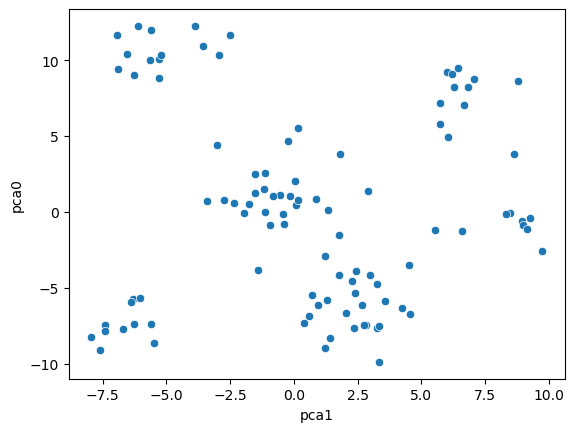

In [146]:
sn.scatterplot(data=pca_test, y ='pca0' ,x = 'pca1') #Test data in pilot data pca space

In [158]:
#grabbing only the first 8
pca_test = pca_test.iloc[:, :9]

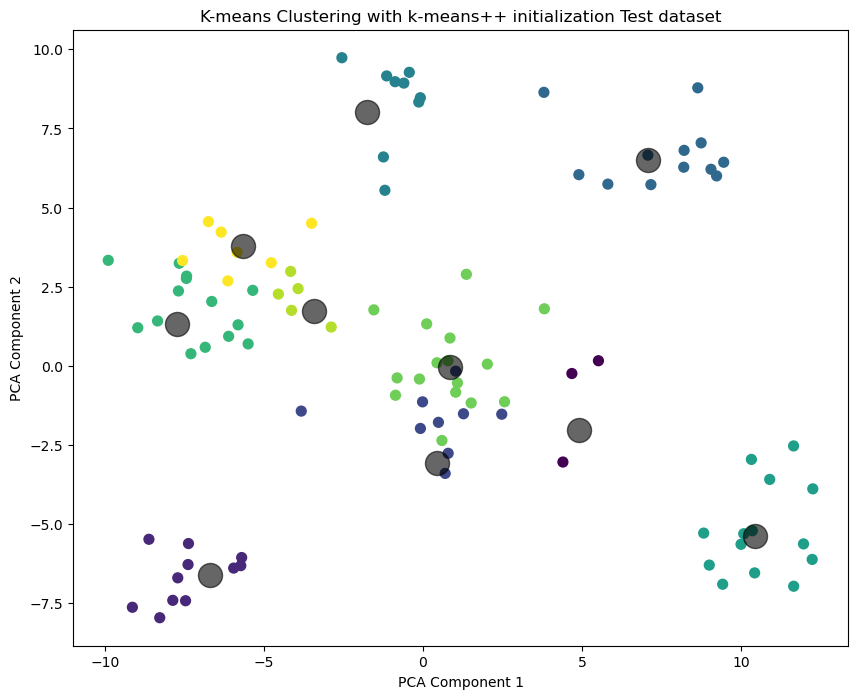

In [108]:
#Kmeans model from Pilot data set implemented on the test dataset pca
kmeans.predict(pca_test)


y_kmeans = kmeans.predict(pca_test)
# Cluster centers
centers = kmeans.cluster_centers_

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_test.iloc[:, 0], pca_test.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6)
plt.title('K-means Clustering with k-means++ initialization Test dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [139]:
predicted_labels = kmeans.predict(pca_test)
true_labels=label

In [122]:
data = pca_test
true_labels_1d = true_labels.flatten()  


ari = adjusted_rand_score(true_labels_1d, predicted_labels)
nmi = normalized_mutual_info_score(true_labels_1d, predicted_labels)
h, c, v = homogeneity_score(true_labels_1d, predicted_labels), completeness_score(true_labels_1d, predicted_labels), v_measure_score(true_labels_1d, predicted_labels)
silhouette_avg = silhouette_score(data, predicted_labels)


print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")
print(f"Homogeneity: {h}, Completeness: {c}, V-measure: {v}")
print(f"Silhouette Coefficient: {silhouette_avg}")

Adjusted Rand Index: 1.0
Normalized Mutual Information: 1.0
Homogeneity: 1.0, Completeness: 1.0, V-measure: 1.0
Silhouette Coefficient: 0.5616648145305629


In [125]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score, cohen_kappa_score, jaccard_score, confusion_matrix

# Assuming true_labels_1d and predicted_labels are already defined and properly formatted

# Adjusted Rand Index
ari = adjusted_rand_score(true_labels_1d, predicted_labels)

# Normalized Mutual Information
nmi = normalized_mutual_info_score(true_labels_1d, predicted_labels)

# Purity is not available as a function, so we'll have to define it
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = confusion_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(true_labels_1d, predicted_labels)

# Fowlkes-Mallows Index
fmi = fowlkes_mallows_score(true_labels_1d, predicted_labels)

# Cohen's Kappa
# Note: Cohen's Kappa is generally used for classification tasks.
# You need to ensure the labels are in the same format and represent the same classes.
kappa = cohen_kappa_score(true_labels_1d, predicted_labels)

# Jaccard Index
# This requires the labels to be binary. If your labels are not binary,
# you'll need to adjust the code to handle multi-class cases appropriately.
jaccard = jaccard_score(true_labels_1d, predicted_labels, average='macro')  # Use 'micro' or 'weighted' for multi-class

# Output the results
print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")
print(f"Purity: {purity}")
print(f"Fowlkes-Mallows Index: {fmi}")
print(f"Cohen's Kappa: {kappa}")
print(f"Jaccard Index: {jaccard}")


Adjusted Rand Index: 1.0
Normalized Mutual Information: 1.0
Purity: 1.0
Fowlkes-Mallows Index: 1.0
Cohen's Kappa: -0.06609808102345416
Jaccard Index: 0.09090909090909091


DBSCAN

For this part i need to combine the pilot dataset and  test the test dataset and train the DBScan to the cluster

In [161]:
true_labels=label
true_labels_1d = true_labels.squeeze().values

pca_subset['origin'] = 'train'
pca_test['origin'] = 'test'

# Combine the datasets row-wise
combined = pd.concat([pca_subset, pca_test], ignore_index=True)

# Apply DBSCAN to the combined dataset
epsilon, min_samples = 4.3, 50
db = DBSCAN(eps=epsilon, min_samples=min_samples)

# Exclude the 'origin' column for clustering
features_for_clustering = combined.drop(columns=['origin'])
db_clusters = db.fit_predict(features_for_clustering)

# Add the DBSCAN predicted labels back to the combined dataframe
combined['db_clusters'] = db_clusters

# Extract the test data
test_data_with_clusters = combined[combined['origin'] == 'test']

# Now, get the predicted labels for the test set
test_predicted_labels = test_data_with_clusters['db_clusters']

# Make sure true_labels is a numpy array with the same order and length as test_predicted_labels
true_labels = true_labels_1d  



# Example metric calculation (make sure to define or replace the metrics functions accordingly)
ari = adjusted_rand_score(true_labels, test_predicted_labels)
nmi = normalized_mutual_info_score(true_labels, test_predicted_labels)

# Calculate Cohen's Kappa
# Note: Cohen's Kappa is typically used for classification tasks. Its use in clustering might not always be appropriate, 
# especially when the number of clusters does not match the number of true classes.
cohen_kappa = cohen_kappa_score(true_labels, test_predicted_labels)

# Calculate Homogeneity, Completeness, and V-measure
homogeneity = homogeneity_score(true_labels, test_predicted_labels)
completeness = completeness_score(true_labels, test_predicted_labels)
v_measure = v_measure_score(true_labels, test_predicted_labels)

# Output the results
print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")
# Purity, Fowlkes-Mallows Index, Jaccard Index, and Silhouette Coefficient calculation here
print(f"Purity: {purity}")
print(f"Fowlkes-Mallows Index: {fmi}")
print(f"Jaccard Index: {jaccard}")
print(f"Silhouette Coefficient: {silhouette_avg}")
print(f"Cohen's Kappa: {cohen_kappa}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}")

C:\Users\Juan\AppData\Local\Temp\ipykernel_16892\654871163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_subset['origin'] = 'train'


Adjusted Rand Index: 0.8639140443837242
Normalized Mutual Information: 0.961722886175531
Purity: 0.91
Fowlkes-Mallows Index: 0.8865848461654546
Jaccard Index: 0.18181818181818182
Silhouette Coefficient: 0.5592980203640031
Cohen's Kappa: 0.16666666666666674
Homogeneity: 0.9262680197515359
Completeness: 1.0
V-measure: 0.961722886175531


C:\Users\Juan\AppData\Local\Temp\ipykernel_16892\2956184975.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  noise_points = pca_test_components[test_predicted_labels == -1]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

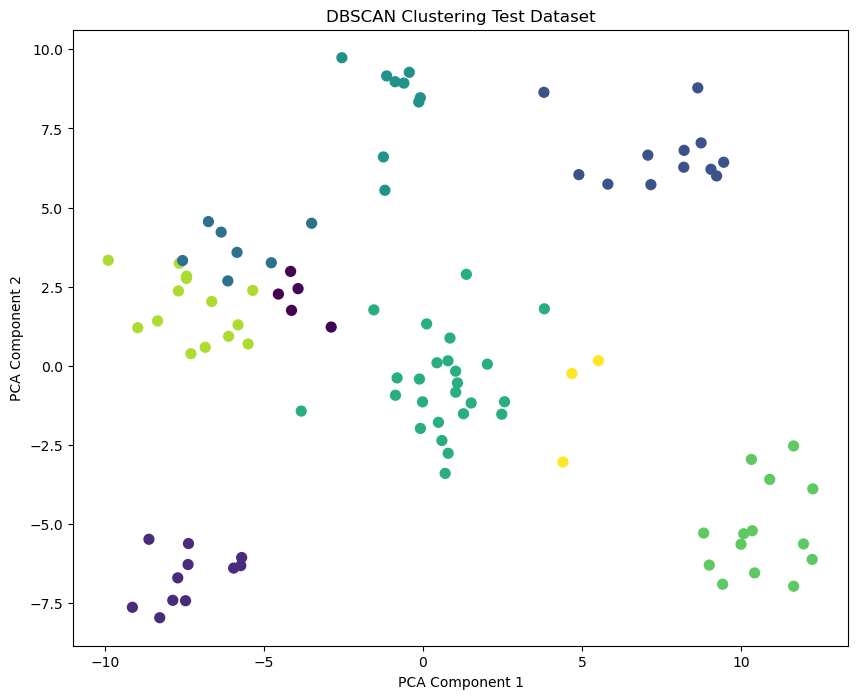

In [167]:
import matplotlib.pyplot as plt

# Make sure you have the pca_test dataset with only the test instances and the DBSCAN labels
test_data_with_clusters = combined[combined['origin'] == 'test']

# Get the PCA components for the test set for plotting
pca_test_components = pca_test[['pca0', 'pca1']]  


test_predicted_labels = test_data_with_clusters['db_clusters']

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_test_components.iloc[:, 0], pca_test_components.iloc[:, 1], c=test_predicted_labels, s=50, cmap='viridis')
plt.title('DBSCAN Clustering Test Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

noise_points = pca_test_components[test_predicted_labels == -1]
plt.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], c='red', s=50, label='Noise')

plt.legend()
plt.show()


OPTICS test dataset

In [162]:
# Initialize the OPTICS model
optics_model = OPTICS(min_samples=50, metric='manhattan')

# Exclude the 'origin' column for clustering
features_for_clustering = combined.drop(columns=['origin'])

# Perform the clustering
optics_clusters = optics_model.fit_predict(features_for_clustering)

# Add the OPTICS predicted labels back to the combined dataframe
combined['optics_clusters'] = optics_clusters

# Extract the test data with OPTICS clusters
test_data_with_clusters = combined[combined['origin'] == 'test']

# Now, get the predicted labels for the test set from the OPTICS clustering
test_predicted_labels = test_data_with_clusters['optics_clusters']

# Make sure true_labels is a numpy array with the same order and length as test_predicted_labels
true_labels = true_labels_1d

# Calculate the evaluation metrics
ari = adjusted_rand_score(true_labels, test_predicted_labels)
nmi = normalized_mutual_info_score(true_labels, test_predicted_labels)
cohen_kappa = cohen_kappa_score(true_labels, test_predicted_labels)
homogeneity = homogeneity_score(true_labels, test_predicted_labels)
completeness = completeness_score(true_labels, test_predicted_labels)
v_measure = v_measure_score(true_labels, test_predicted_labels)

# Silhouette score calculation (if applicable, make sure test data is separated properly)
silhouette_avg = silhouette_score(features_for_clustering[combined['origin'] == 'test'], test_predicted_labels)

# Output the results
print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")
# Purity, Fowlkes-Mallows Index, Jaccard Index, and Silhouette Coefficient calculation here
# Make sure to calculate purity, fmi, and jaccard if they are still needed
print(f"Purity: {purity}")
print(f"Fowlkes-Mallows Index: {fmi}")
print(f"Jaccard Index: {jaccard}")
print(f"Silhouette Coefficient: {silhouette_avg}")
print(f"Cohen's Kappa: {cohen_kappa}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}")

Adjusted Rand Index: 0.8639140443837242
Normalized Mutual Information: 0.961722886175531
Purity: 0.91
Fowlkes-Mallows Index: 0.8865848461654546
Jaccard Index: 0.18181818181818182
Silhouette Coefficient: 0.5807687368751281
Cohen's Kappa: 0.03565821933168878
Homogeneity: 0.9262680197515359
Completeness: 1.0
V-measure: 0.961722886175531


C:\Users\Juan\AppData\Local\Temp\ipykernel_16892\138520938.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  noise_points = pca_test_components[test_predicted_labels == -1]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

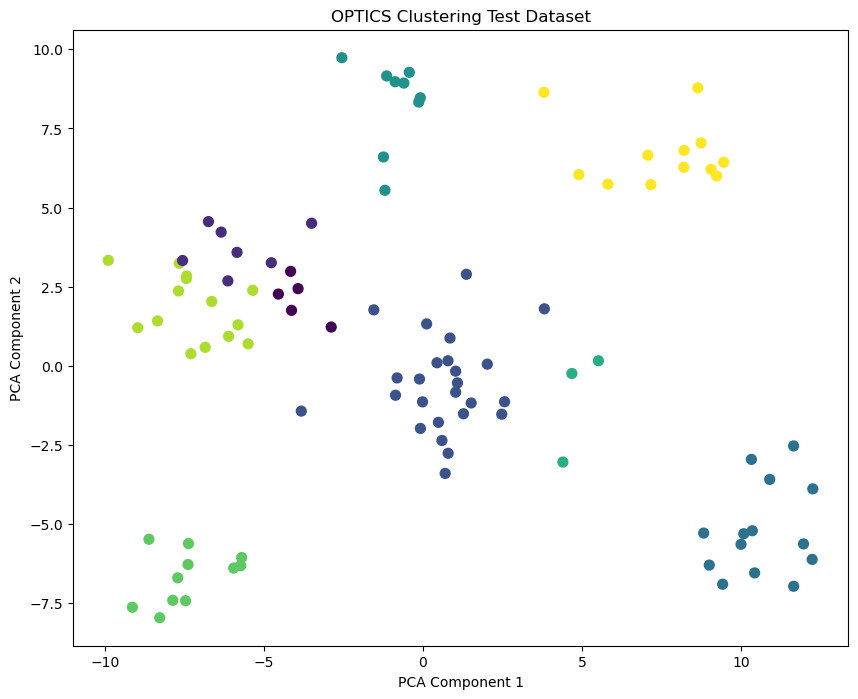

In [170]:
import matplotlib.pyplot as plt

test_data_with_clusters = combined[combined['origin'] == 'test']

# Get the PCA components for the test set for plotting
pca_test_components = pca_test[['pca0', 'pca1']] 

test_predicted_labels = test_data_with_clusters['optics_clusters']

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_test_components.iloc[:, 0], pca_test_components.iloc[:, 1], c=test_predicted_labels, s=50, cmap='viridis')
plt.title('OPTICS Clustering Test Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

noise_points = pca_test_components[test_predicted_labels == -1]
plt.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], c='red', s=50, label='Noise')

plt.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


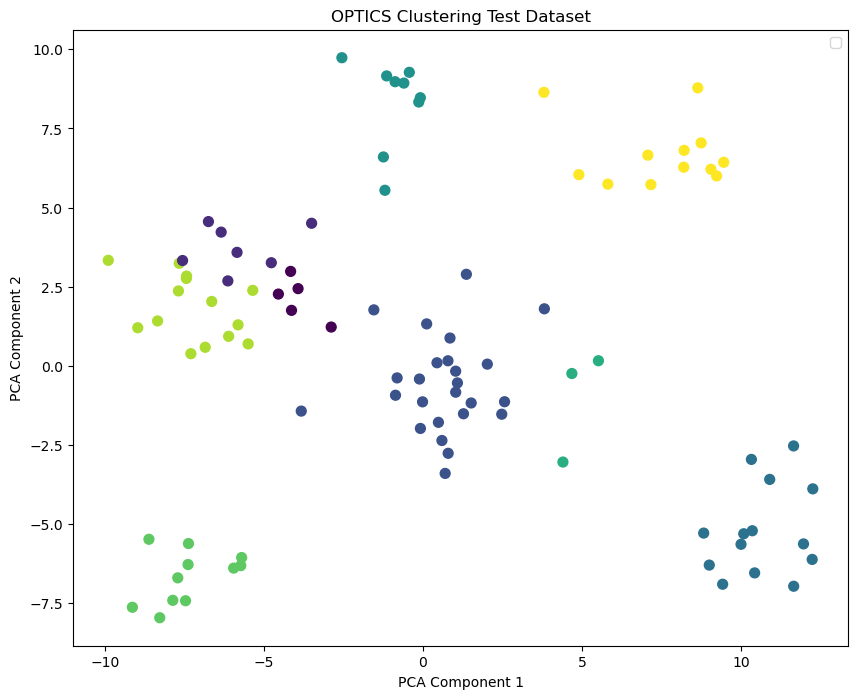

In [171]:
pca_test_components = pca_test_components.reset_index(drop=True)
test_predicted_labels = test_predicted_labels.reset_index(drop=True)

plt.figure(figsize=(10, 8))
plt.scatter(pca_test_components.iloc[:, 0], pca_test_components.iloc[:, 1], c=test_predicted_labels, s=50, cmap='viridis')
plt.title('OPTICS Clustering Test Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# To plot the noise points, ensure indices are aligned and then filter
noise_indices = test_predicted_labels == -1
if noise_indices.any():  # Check if there are any noise points
    noise_points = pca_test_components[noise_indices]
    plt.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], c='red', s=50, label='Noise')

plt.legend()
plt.show()


LDA

In [176]:
pca_test = pd.DataFrame(pipeline.transform(test_data),columns=pipeline['PCA'].get_feature_names_out())
print(pca_test)

         pca0      pca1      pca2      pca3      pca4      pca5      pca6   
0    4.683993 -0.239858  5.279718  2.877744  1.782177  5.112998  4.306371  \
1   -3.922161  2.441627 -5.657949 -5.026949  6.736695  1.326431  1.104377   
2   -6.739541  4.559196 -2.562851  0.106377  6.027469 -0.360980 -1.571965   
3   10.428563 -6.538074 -0.480333 -2.928158 -0.238829  0.442534  0.503245   
4   10.086334 -5.301476 -1.069090 -1.253262 -2.234857  0.754157  0.305051   
..        ...       ...       ...       ...       ...       ...       ...   
95  -7.552245  3.329200 -3.455296 -0.035161  6.236752  0.326699 -1.695679   
96  -1.239517  6.601183 -5.930320 -0.241385 -1.098617  0.665294  0.616789   
97   0.790114  0.162517  2.063839  5.656583  0.558647  0.092857 -2.077364   
98   9.456373  6.433965  6.958477 -0.597752  2.997139  1.132049 -0.503845   
99  10.000387 -5.634330 -3.773182 -3.731959  0.047953 -0.424882  0.575501   

        pca7      pca8      pca9  ...         pca90         pca91   
0   1.

In [177]:
pca_test = pca_test.iloc[:, :9]
pca_test
#pca_test.drop('origin')

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
0,4.683993,-0.239858,5.279718,2.877744,1.782177,5.112998,4.306371,1.540953,0.774315
1,-3.922161,2.441627,-5.657949,-5.026949,6.736695,1.326431,1.104377,-0.970269,-0.036424
2,-6.739541,4.559196,-2.562851,0.106377,6.027469,-0.360980,-1.571965,0.650916,1.321909
3,10.428563,-6.538074,-0.480333,-2.928158,-0.238829,0.442534,0.503245,0.981725,0.007756
4,10.086334,-5.301476,-1.069090,-1.253262,-2.234857,0.754157,0.305051,0.238416,0.291312
...,...,...,...,...,...,...,...,...,...
95,-7.552245,3.329200,-3.455296,-0.035161,6.236752,0.326699,-1.695679,-0.372506,0.349888
96,-1.239517,6.601183,-5.930320,-0.241385,-1.098617,0.665294,0.616789,-0.371568,-0.361700
97,0.790114,0.162517,2.063839,5.656583,0.558647,0.092857,-2.077364,0.258805,-0.415105
98,9.456373,6.433965,6.958477,-0.597752,2.997139,1.132049,-0.503845,-0.026671,-0.501803


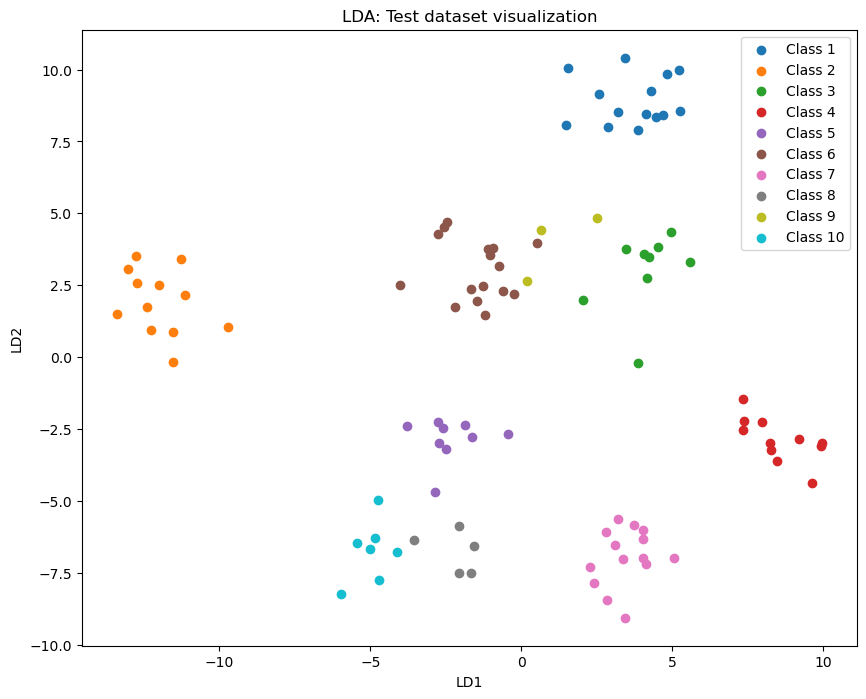

In [178]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Assuming test_features is your test dataset without the labels
# and test_labels are the true labels for the test data
test_features = pca_test  # If pca_test is the test dataset after applying PCA or other preprocessing
test_labels = true_labels_1d  # True class labels for the test data

# Initialize LDA
lda = LDA(n_components=2)  # n_components should be less than the number of classes

# Fit LDA on the test data - note that unlike PCA, LDA is supervised and uses class labels
lda_transformed = lda.fit_transform(test_features, test_labels)

# Plot the LDA-transformed test data
plt.figure(figsize=(10, 8))
for class_value in np.unique(test_labels):
    # Select rows where the class label is equal to the current class_value
    row_ix = np.where(test_labels == class_value)
    plt.scatter(lda_transformed[row_ix, 0], lda_transformed[row_ix, 1], label=f'Class {class_value}')

plt.title('LDA: Test dataset visualization')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [180]:
predicted_labels = lda.predict(test_features)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate metrics
ari = adjusted_rand_score(test_labels, predicted_labels)
nmi = normalized_mutual_info_score(test_labels, predicted_labels)
cohen_kappa = cohen_kappa_score(test_labels, predicted_labels)
homogeneity = homogeneity_score(test_labels, predicted_labels)
completeness = completeness_score(test_labels, predicted_labels)
v_measure = v_measure_score(test_labels, predicted_labels)

# Additional classification metrics
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

# Output the results
print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")
print(f"Cohen's Kappa: {cohen_kappa}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Adjusted Rand Index: 1.0
Normalized Mutual Information: 1.0
Cohen's Kappa: 1.0
Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


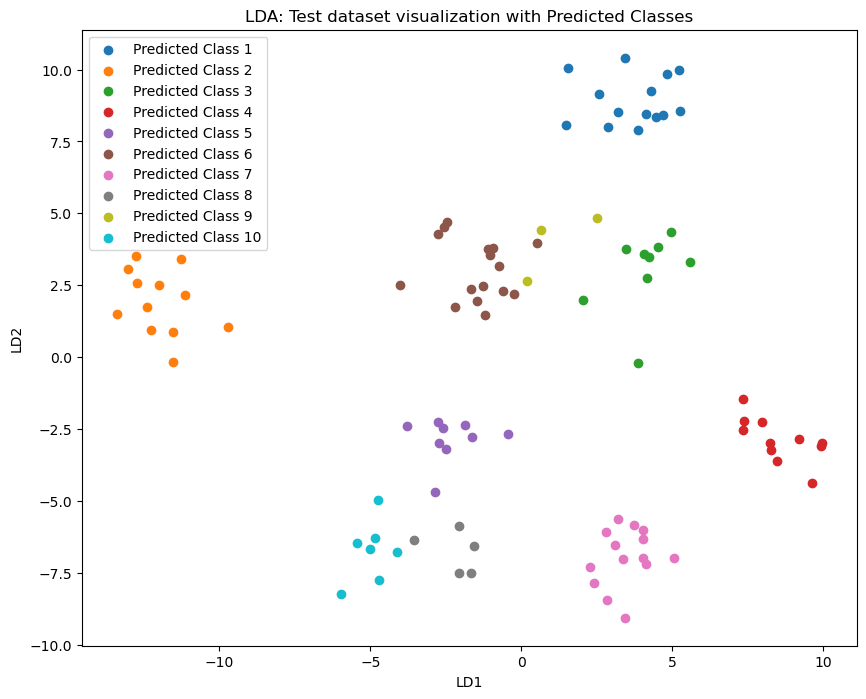

In [182]:
# Assuming test_features are your PCA-transformed test dataset without the labels
# and test_labels are the true labels for the test data
test_features = pca_test  # Your PCA-transformed test data
test_labels = true_labels_1d  # True class labels for the test data

# Initialize LDA
lda = LDA()  # n_components is not needed for prediction, only for dimensionality reduction

# Fit LDA on the test data - note that unlike PCA, LDA is supervised and uses class labels
lda.fit(test_features, test_labels)

# Use the model to predict the classes
predicted_labels = lda.predict(test_features)

# If you wish to visualize the results in the transformed space
lda_transformed = lda.transform(test_features)  # Transformed features

# Plot the LDA-transformed test data
plt.figure(figsize=(10, 8))
for class_value in np.unique(test_labels):
    # Select rows where the predicted class label is equal to the current class_value
    row_ix = np.where(predicted_labels == class_value)
    plt.scatter(lda_transformed[row_ix, 0], lda_transformed[row_ix, 1], label=f'Predicted Class {class_value}')

plt.title('LDA: Test dataset visualization with Predicted Classes')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()